# Initialization 

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bs4
import requests
from collections import defaultdict
%matplotlib inline

file_opioids = 'opioids.csv'
file_overdoses = 'overdoses.csv'
file_prescribers = 'prescriber-info.csv'

In [62]:
opioids = pd.read_csv(file_opioids)
overdoses = pd.read_csv(file_overdoses)
prescribers = pd.read_csv(file_prescribers)

In [63]:
overdoses = overdoses.set_index('State')

In [64]:
overdoses['Population']=overdoses['Population'].str.replace(',', '')
overdoses['Deaths']=overdoses['Deaths'].str.replace(',','')

In [65]:
overdoses[['Population', 'Deaths']]=overdoses[['Population','Deaths']].apply(pd.to_numeric)

In [66]:
max_deaths = overdoses['Deaths'].max()

In [67]:
# per capita measure might be better 
overdoses['Deaths Per Capita'] = overdoses['Deaths']/ overdoses['Population']
max_deaths_per_capita=overdoses['Deaths Per Capita'].max()
min_deaths_per_capita=overdoses['Deaths Per Capita'].min()
print('Max Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print('-'*100)
print('Max Deaths')
print(overdoses.loc[overdoses['Deaths']==max_deaths])
print('-'*100)
print('Min Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==min_deaths_per_capita])
print('-'*100)
print('Descriptions')
print(overdoses['Deaths'].describe())
print(overdoses['Deaths Per Capita'].describe())

Max Deaths Per Capita
               Population  Deaths Abbrev  Deaths Per Capita
State                                                      
West Virginia     1854304     627     WV           0.000338
----------------------------------------------------------------------------------------------------
Max Deaths
            Population  Deaths Abbrev  Deaths Per Capita
State                                                   
California    38332521    4521     CA           0.000118
----------------------------------------------------------------------------------------------------
Min Deaths Per Capita
              Population  Deaths Abbrev  Deaths Per Capita
State                                                     
North Dakota      723393      43     ND           0.000059
----------------------------------------------------------------------------------------------------
Descriptions
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000

In [68]:
# set index to prescriber identification number
prescribers=prescribers.set_index('NPI')

In [69]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita
State,,,,
Virginia,8260405,980,VA,0.000119
Washington,6971406,979,WA,0.000140
West Virginia,1854304,627,WV,0.000338
Wisconsin,5742713,853,WI,0.000149
Wyoming,582658,109,WY,0.000187


In [70]:
prescribers.tail()

,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1619019353,F,WA,M.D.,Family Practice,0,12,0,0,0,46,...,0,0,0,0,39,0,0,0,0,1
1780693671,F,MI,DO,Internal Medicine,0,15,0,0,0,0,...,0,0,0,0,20,0,0,0,0,1
1346270956,M,AZ,MD,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1518913672,M,NY,M.D.,Dermatology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# rename column because it's confusing
prescribers= prescribers.rename({'State':'Abbrev'}, axis=1);

In [72]:
# add prescriber information to overdose df 
prescribers_per_state = []
for index, row in overdoses.iterrows(): 
    prescribers_per_state.append(prescribers.loc[prescribers['Abbrev']==row['Abbrev']].shape[0])
overdoses['Prescribers'] = prescribers_per_state

In [73]:
# prescribers per capita
overdoses['Prescribers Per Capita'] = overdoses['Prescribers']/overdoses['Population']

In [74]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita,Prescribers,Prescribers Per Capita
State,,,,,,
Virginia,8260405,980,VA,0.000119,568,0.000069
Washington,6971406,979,WA,0.000140,578,0.000083
West Virginia,1854304,627,WV,0.000338,199,0.000107
Wisconsin,5742713,853,WI,0.000149,498,0.000087
Wyoming,582658,109,WY,0.000187,38,0.000065


In [75]:
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print(overdoses.loc[overdoses['Deaths']==max_deaths])

               Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                      
West Virginia     1854304     627     WV           0.000338          199   

               Prescribers Per Capita  
State                                  
West Virginia                0.000107  
            Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                   
California    38332521    4521     CA           0.000118         2562   

            Prescribers Per Capita  
State                               
California                0.000067  


In [76]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']== 'WV']
wv_prescribers[:5]

,Gender,Abbrev,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1831118678,F,WV,MD,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1295753507,M,WV,D.D.S.,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477532679,F,WV,CFNP,Nurse Practitioner,0,0,0,19,0,12,...,0,0,0,0,0,0,12,0,25,1
1417952565,M,WV,DO,Family Practice,0,0,0,18,0,0,...,0,0,0,0,14,0,0,0,0,1
1750505384,F,WV,M.D.,Psychiatry,90,0,0,0,0,0,...,0,0,0,0,0,0,0,27,16,1


In [77]:
# Census Bureau-designated regions and divisions 
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

#divisions
new_england= dict.fromkeys(['CT', 'ME', 'MA', 'NH', 'RI', 'VT'], 'new england')
mid_atlantic = dict.fromkeys(['NJ', 'NY', 'PA'], 'mid atlantic')
east_north_central = dict.fromkeys(['IL', 'IN', 'MI', 'OH', 'WI'],'east north central')
west_north_central = dict.fromkeys(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'], 'west north central')
south_atlantic = dict.fromkeys(['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV'], 'south atlantic')
east_south_central = dict.fromkeys(['AL', 'KY', 'MS', 'TN'], 'east south central')
west_south_central = dict.fromkeys(['AR', 'LA', 'OK', 'TX'], 'west south central')
mountain = dict.fromkeys(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'], 'mountain')
pacific = dict.fromkeys(['AK', 'CA', 'HI', 'OR', 'WA'], 'pacific')

division_list = [new_england, mid_atlantic, east_north_central, west_north_central, south_atlantic, 
            east_south_central, west_south_central, mountain, pacific]
divisions = {}
for div in division_list: 
    divisions.update(div)
    
#regions 
northeast = dict.fromkeys(list(new_england.keys())+list(mid_atlantic.keys()), 'new england')
midwest = dict.fromkeys(list(east_north_central.keys())+list(west_north_central.keys()),'midwest') 
south = dict.fromkeys(list(south_atlantic.keys()) + list(east_south_central.keys()) + list(west_south_central.keys()),'south')
west = dict.fromkeys(list(mountain.keys()) + list(pacific.keys()),'west')

region_list = [northeast, midwest, south, west]
regions = {}
for region in region_list:
    regions.update(region)

In [78]:
overdoses['Region']= overdoses['Abbrev'].map(regions)
overdoses['Division']=overdoses['Abbrev'].map(divisions)

In [79]:
# try scraping to get regions and divisions instead 
url = 'https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States'
regions_req = requests.get(url)
soup = bs4.BeautifulSoup(regions_req.content)

heading = soup.find(id='cite_ref-census_6-0') 
regions = heading.find_next('ul')
print(regions.prettify())
for region in regions:
    division = region.find_next('li')
    for div in division:
        print(div)

C:\Users\ryatchak\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\ryatchak\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<ul>
 <li>
  Region 1:
  <a href="/wiki/Northeastern_United_States" title="Northeastern United States">
   Northeast
  </a>
  <ul>
   <li>
    Division 1:
    <a href="/wiki/New_England" title="New England">
     New England
    </a>
    (
    <a href="/wiki/Connecticut" title="Connecticut">
     Connecticut
    </a>
    ,
    <a href="/wiki/Maine" title="Maine">
     Maine
    </a>
    ,
    <a href="/wiki/Massachusetts" title="Massachusetts">
     Massachusetts
    </a>
    ,
    <a href="/wiki/New_Hampshire" title="New Hampshire">
     New Hampshire
    </a>
    ,
    <a href="/wiki/Rhode_Island" title="Rhode Island">
     Rhode Island
    </a>
    , and
    <a href="/wiki/Vermont" title="Vermont">
     Vermont
    </a>
    )
   </li>
   <li>
    Division 2:
    <a class="mw-redirect" href="/wiki/Mid-Atlantic_states" title="Mid-Atlantic states">
     Mid-Atlantic
    </a>
    (
    <a href="/wiki/New_Jersey" title="New Jersey">
     New Jersey
    </a>
    ,
    <a href="/wiki/New_Y

In [126]:
# this list is easier to scrape
url_gov = 'https://www2.census.gov/geo/docs/maps-data/maps/reg_div.txt'
regions_req = requests.get(url_gov)
soup_gov = bs4.BeautifulSoup(regions_req.content)
text = soup_gov.p 

C:\Users\ryatchak\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\ryatchak\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [146]:
pre_digested = [s.strip('\r') for s in text.contents[0].split('\n')]
digested = [s for s in pre_digested if s!=''][1:] # remove empty strings, header 
print(digested)
region_index = [index for index, s in enumerate(digested) if 'REGION' in s]
div_index = [index for index, s in enumerate(digested) if 'Division' in s]
print(region_index)

# get divisions
div_dict = defaultdict()
for id in div_index: 
    div_name = digested[id].split(':')[1].strip
    print(div_name)
# get regions 

['REGION I: NORTHEAST', 'Division I: New England ', 'Connecticut     (09)', 'Maine           (23)', 'Massachusetts   (25)', 'New Hampshire   (33)', 'Rhode Island    (44)', 'Vermont         (50)', 'Division 2: Middle Atlantic', 'New Jersey      (34)', 'New York        (36)', 'Pennsylvania    (42)', 'REGION 2: MIDWEST*', 'Division 3:  East North Central', 'Illinois        (17)', 'Indiana         (18)', 'Michigan        (26)', 'Ohio            (39)', 'Wisconsin       (55)', 'Division 4:  West North Central', 'Iowa            (19)', 'Kansas          (20) ', 'Minnesota       (27)', 'Missouri        (29)', 'Nebraska        (31)', 'North Dakota    (38)', 'South Dakota    (46)', 'REGION 3: SOUTH', 'Division 5: South Atlantic', 'Delaware        (10)', 'District of Columbia (11)', 'Florida         (12)', 'Georgia         (13)', 'Maryland        (24)', 'North Carolina  (37)', 'South Carolina  (45)', 'Virginia        (51)', 'West Virginia   (54)', 'Division 6: East South Central', 'Alabama        

NameError: name 'defaultdict' is not defined

# Visualizations 

## *Overdose Deaths Per Capita*

Text(0.5,1,'Opioid Overdose Deaths per capita in all 50 States')

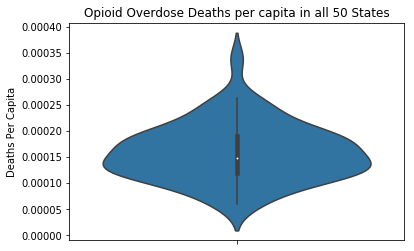

In [80]:
# visualize deaths per capita
dpc_violin = sns.violinplot(y='Deaths Per Capita', data=overdoses)
dpc_violin.set_title('Opioid Overdose Deaths per capita in all 50 States')

In [81]:
overdoses_dpc = overdoses.sort_values('Deaths Per Capita')

Text(0.5,1,'Opioid Overdose Deaths Per Capita by State')

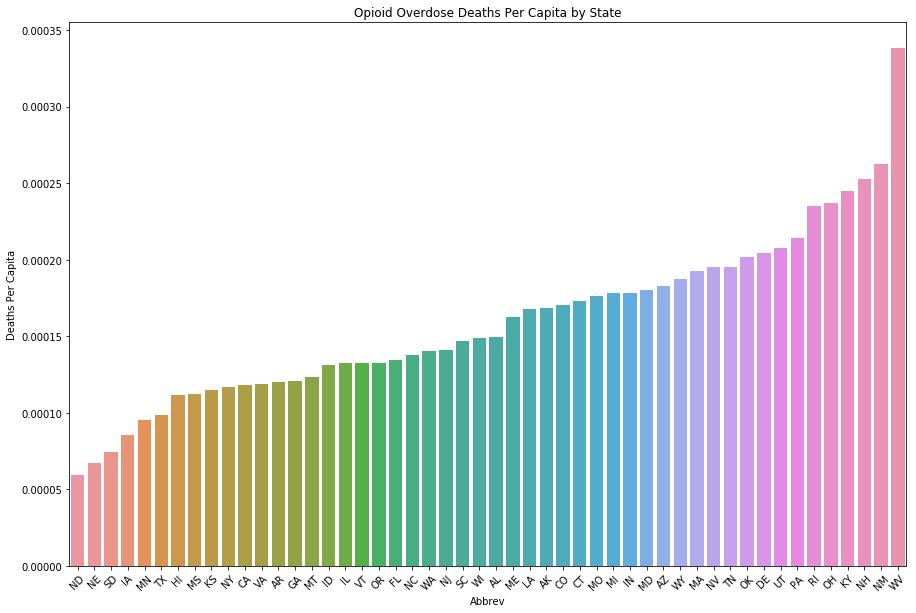

In [82]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Deaths Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Opioid Overdose Deaths Per Capita by State')

## *Providers Per Capita*

Text(0.5,1,'Prescribers Per Capita in all 50 States')

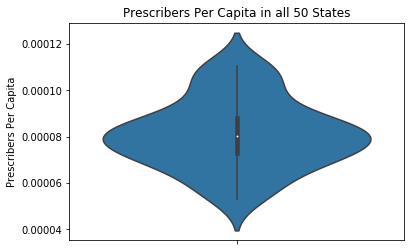

In [83]:
# Visualize prescribers per capita
prescriber_violin = sns.violinplot(y='Prescribers Per Capita', data=overdoses)
prescriber_violin.set_title('Prescribers Per Capita in all 50 States')

Text(0.5,1,'Prescribers Per Capita by State')

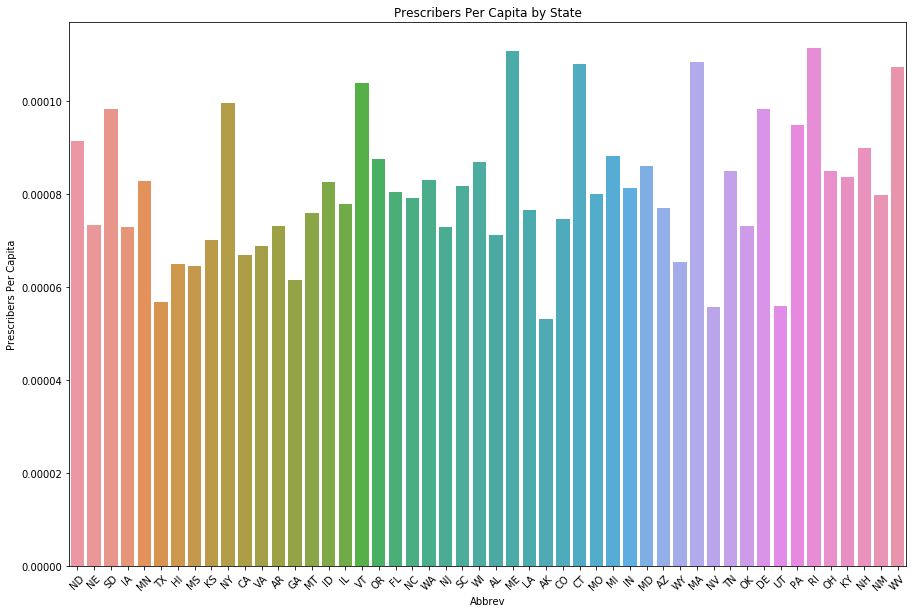

In [84]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Prescribers Per Capita', data = overdoses_dpc)
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Prescribers Per Capita by State')

Text(0.5,1,'Deaths Per Capita versus Prescribers Per Capita')

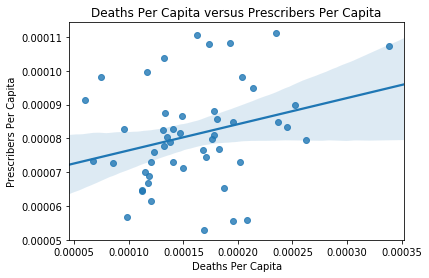

In [85]:
# Opioid overdoses per capita not directly correlated to prescribers per capita
dpc_ppc_line = sns.regplot(x='Deaths Per Capita', y = 'Prescribers Per Capita', data = overdoses)
dpc_ppc_line.set_title('Deaths Per Capita versus Prescribers Per Capita')

# Are there Regional/Divisional Differences?

Text(0.5,1,'Opioid Overdose Deaths per capita by region')

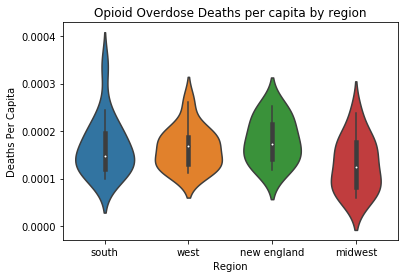

In [86]:
# repeat violin plot for deaths per capita, separate by region 
dpc_region_violin = sns.violinplot(x='Region', y='Deaths Per Capita', data=overdoses)
dpc_region_violin.set_title('Opioid Overdose Deaths per capita by region')

Text(0.5,1,'Prescribers Per Capita by Region')

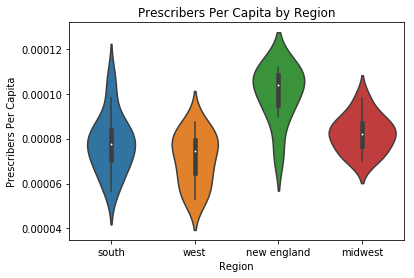

In [88]:
# prescribers per capita by region
prescriber_region_violin = sns.violinplot(x='Region', y='Prescribers Per Capita', data=overdoses)
prescriber_region_violin.set_title('Prescribers Per Capita by Region')

Text(0.5,1,'Non-Opioid vs. Opioid Prescriber by Region')

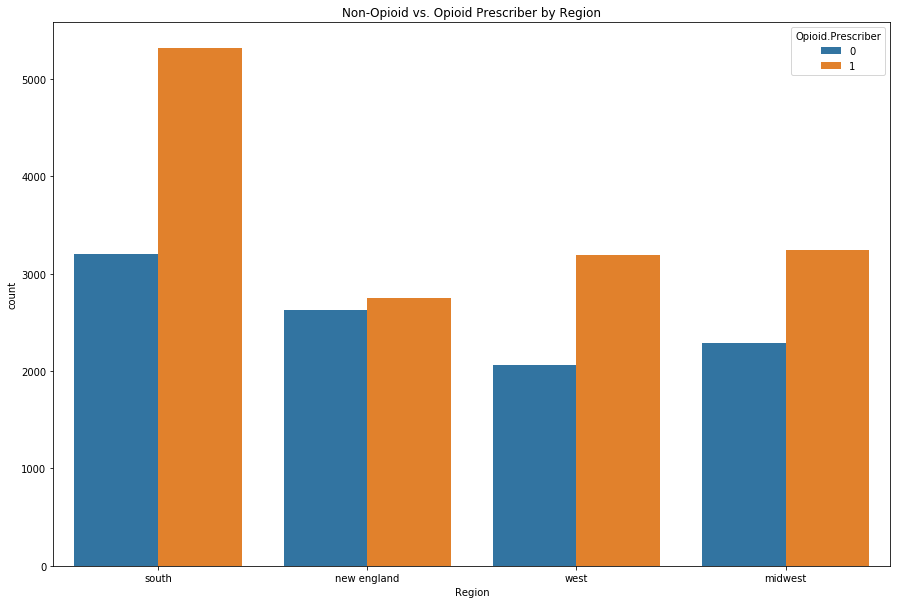

In [93]:
# opioid prescribers vs nonprescribers by region
plt.subplots(figsize=(15,10))
opioid_presc_count = sns.countplot(x='Region', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_count.set_title('Non-Opioid vs. Opioid Prescriber by Region')

## Divisions

Text(0.5,1,'Opioid Overdose Deaths per capita by Division')

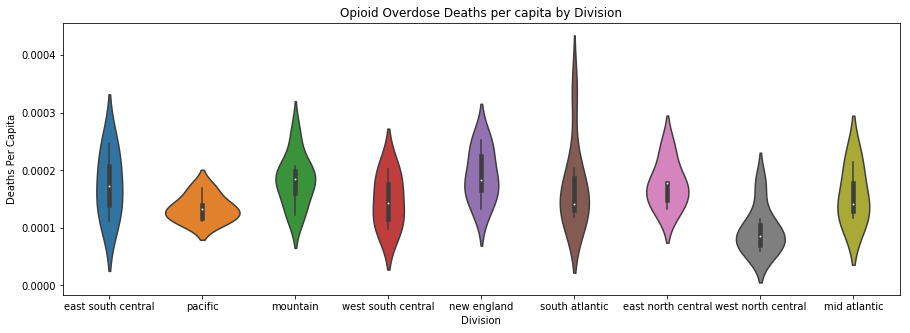

In [91]:
# repeat violin plot for deaths per capita, separate by region 
plt.subplots(figsize=(15,5))
dpc_division_violin = sns.violinplot(x='Division', y='Deaths Per Capita', data=overdoses)
dpc_division_violin.set_title('Opioid Overdose Deaths per capita by Division')

Text(0.5,1,'Prescribers Per Capita by Division')

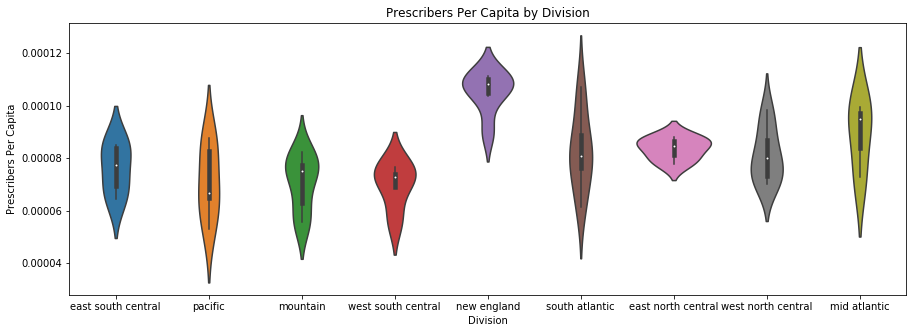

In [90]:
# prescribers per capita by division
plt.subplots(figsize=(15,5))
prescriber_division_violin = sns.violinplot(x='Division', y='Prescribers Per Capita', data=overdoses)
prescriber_division_violin.set_title('Prescribers Per Capita by Division')

Text(0.5,1,'Non-Opioid vs. Opiod Prescribers by division')

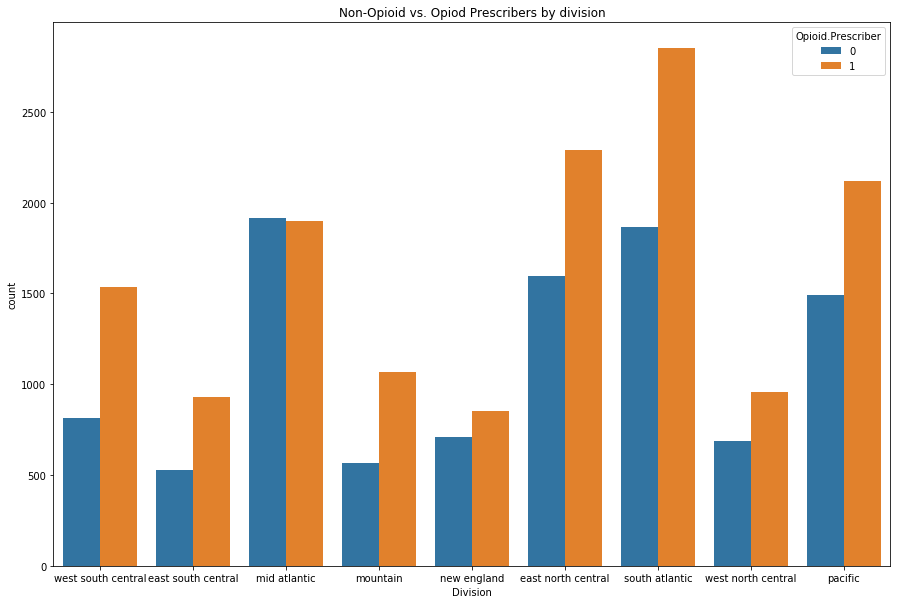

In [92]:
# opioid prescribers vs nonprescribers by division
plt.subplots(figsize=(15,10))
opioid_presc_bar = sns.countplot(x='Division', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_bar.set_title('Non-Opioid vs. Opiod Prescribers by division')

# Medical Practitioners and the Drugs they Prescribe

In [95]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']=='WV'] # prescribers of highest per capita death rate state
nd_prescribers = prescribers.loc[prescribers['Abbrev']=='ND'] # prescribers of lowest per capita death rate state 

In [96]:
wv_prescribers.describe()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,3.301508,1.874372,0.231156,8.809045,0.180905,6.025126,11.221106,31.361809,2.572864,6.030151,...,2.919598,2.793970,1.105528,1.613065,26.467337,3.567839,7.110553,1.658291,13.391960,0.633166
std,18.844112,7.819898,1.619588,23.129056,1.465922,16.537511,31.155384,138.570041,12.244292,15.192339,...,12.060184,12.933894,7.582803,8.577397,87.937292,19.432977,19.456448,9.243825,41.724289,0.483156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,196.000000,65.000000,12.000000,212.000000,12.000000,112.000000,192.000000,1728.000000,109.000000,89.000000,...,91.000000,145.000000,96.000000,77.000000,779.000000,218.000000,104.000000,106.000000,454.000000,1.000000


(199, 255)


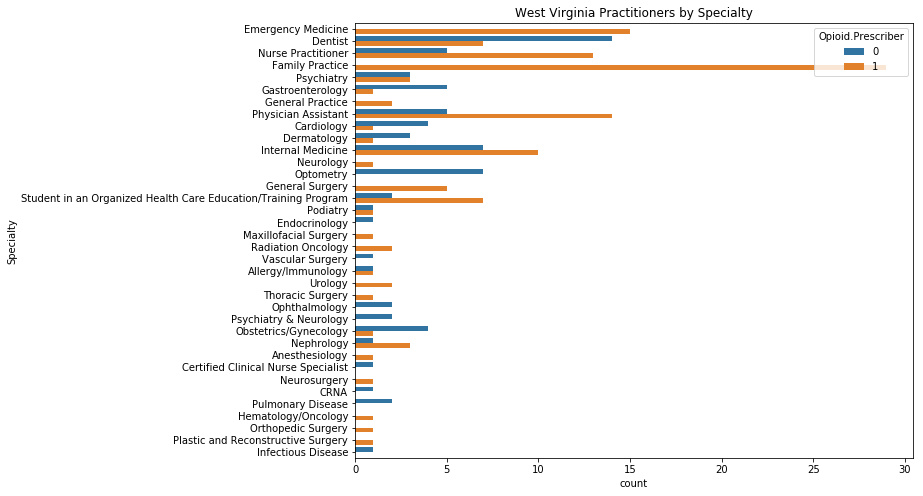

In [100]:
plt.subplots(figsize=(10,8))

wv_opioid_prescribers_byspecialty = sns.countplot(y='Specialty', hue = 'Opioid.Prescriber', data = wv_prescribers)
wv_opioid_prescribers_byspecialty.set_title('West Virginia Practitioners by Specialty')
print(wv_prescribers.shape)

In [107]:
nd_prescribers.describe()

,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.606061,2.181818,1.272727,9.954545,0.939394,12.939394,15.348485,8.090909,2.469697,5.727273,...,3.621212,2.000000,0.924242,0.787879,27.787879,1.424242,4.363636,0.787879,7.348485,0.590909
std,5.448723,9.488307,5.484371,23.246791,4.653795,28.258085,34.467149,27.917310,7.465242,17.651799,...,8.796442,7.306478,4.581940,4.521794,63.612895,8.061419,13.633258,6.400758,19.755032,0.495434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.250000,0.000000,0.000000,0.000000,0.000000,1.000000
max,28.000000,68.000000,31.000000,123.000000,31.000000,105.000000,168.000000,203.000000,30.000000,106.000000,...,46.000000,40.000000,30.000000,29.000000,360.000000,62.000000,65.000000,52.000000,112.000000,1.000000


(66, 255)


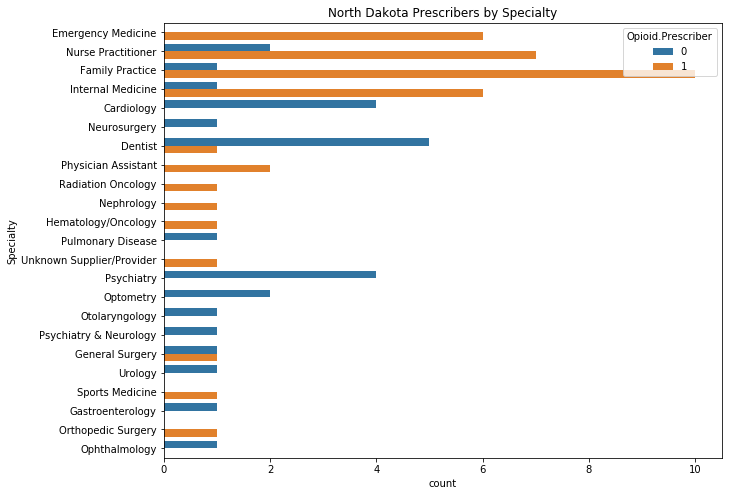

In [99]:
plt.subplots(figsize=(10,8))

nd_opioid_prescribers_byspecialty = sns.countplot(y='Specialty', hue = 'Opioid.Prescriber', data = nd_prescribers)
nd_opioid_prescribers_byspecialty.set_title('North Dakota Prescribers by Specialty')
print(nd_prescribers.shape)

### Number of Prescribers in each state

In [104]:
print(prescribers.shape)

(25000, 255)


Text(0.5,1,'Number of Prescribers per State')

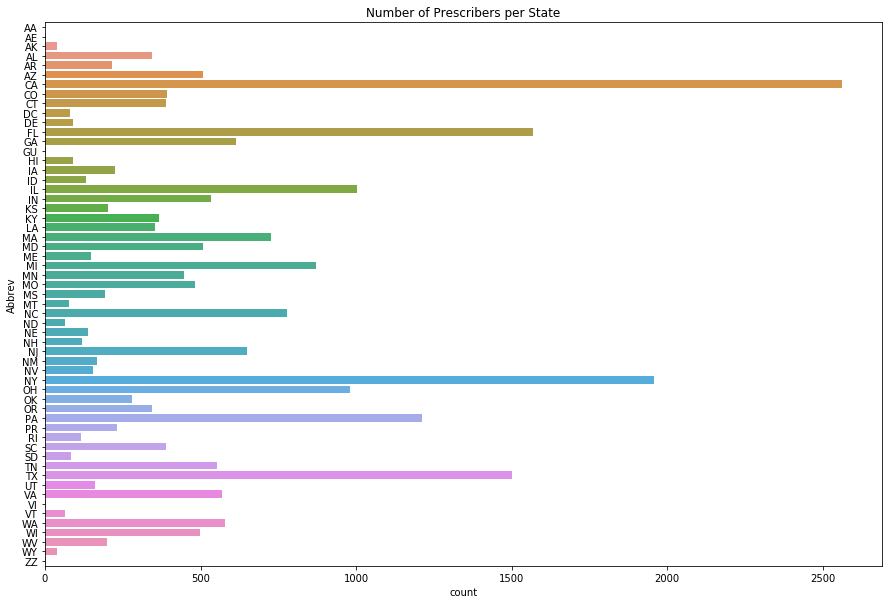

In [102]:
plt.subplots(figsize=(15,10))
practitioner_count = sns.countplot(y='Abbrev', data=prescribers.sort_values('Abbrev'))
practitioner_count.set_title('Number of Prescribers per State')

In [106]:
prescribers.sort_values('Abbrev')[:5]

,Gender,Abbrev,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
NPI,,,,,,,,,,,,,,,,,,,,,
1710293584,M,AA,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295706398,M,AE,PA-C,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1093867137,F,AE,M.D.,Internal Medicine,0,0,0,11,0,0,...,0,0,0,0,0,0,0,0,15,1
1265436752,F,AK,"ANP,BC",Nurse Practitioner,0,0,0,0,0,0,...,0,0,0,0,0,0,0,81,12,0
1508972043,M,AK,PA-C,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
